<a href="https://colab.research.google.com/github/kushasareen/hello-world/blob/master/Linear%20Regression%20for%20CAE%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

We want to take a dataset of 1 person and do linear regression (15 dimentionality) on each feature vs. time.

In [235]:
# read in the data as pandas dataframes
#.sort_values(0) sorts ascending
fileName='https://raw.githubusercontent.com/prashansa/implementAI-CAEchallenge/master/CAE_dataset.csv'
ds = pd.read_csv(fileName)
#df[0:5]
df = ds.iloc[:648]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 13 columns):
Unnamed: 0    648 non-null int64
0             648 non-null float64
1             648 non-null float64
2             648 non-null float64
3             648 non-null float64
4             648 non-null float64
5             648 non-null float64
6             648 non-null float64
7             648 non-null float64
8             648 non-null float64
9             648 non-null float64
label         648 non-null int64
Id            648 non-null int64
dtypes: float64(10), int64(3)
memory usage: 65.9 KB


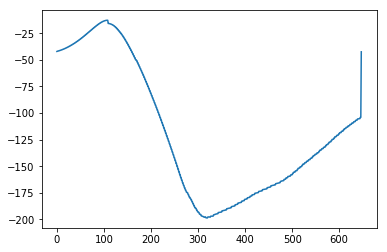

In [236]:
X = np.array(df.iloc[:, 0:1])

#the zeroth column has no name
y = df['1'].to_numpy()

plt.plot(X, y)


Polynomial Reression on model

PolynomialFeatures(degree=8, include_bias=True, interaction_only=False,
                   order='C')


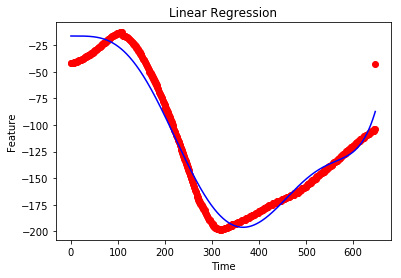

In [257]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=8)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

print(poly_reg)

       
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Time')
    plt.ylabel('Feature')
    plt.show()

       
viz_polymonial()

Now we hope to use this regression and extract a set of inputs for our neural network.

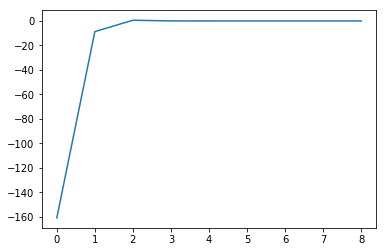

In [256]:
def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))


max_value = 0
min_value = 0
highest_slope = 0
arc_length = 0
avg_value = 0
mse = 0

inputs = [max_value, min_value, highest_slope, arc_length, avg_value, mse]

We now add the code for a basic neural network.